In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
#from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [136]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
####################
# Data Information
####################
# PassengerId: Identification of passenger for accuracy check on Kaggle
# Survived: If the individual survivied (1) or died (0)
# Pclass: The ticket class: 1: 1st class, 2: 2nd class, 3: 3rd class
# Name: The name of the individual: String #### Not sure if there is meaningful data here?
# Sex: male vs female: *** This Data should be encoded as Male(1) and Female(0)
# SibSp: Number of Siblings & Spouses aboard
# Parch: Number of Parents & Children aboard
# Ticket: Ticket Number: *** Not sure of the meaningfulness behind the data?
# Fare: Cost of the passenger
# Cabin: Cabin Number: *** Not sure if this is meaningful? Notable amount of Null values
# Embarked: Location of Embarkation *** This Data should be Encoded as C(0), Q(1), S(2)

####################
# Classification Problem: Determine if the passenger will Survive (1) or Die (0)
####################

##### Notes to check the data #######
# Did the wealthy survive? Middle Class?
# Did Younger individuals survive? Lower class children vs upper class adults?
# Did location matter? Did certain Embarked areas correlate to wealthier individuals?
# Were Females more likely to survive?  
# Larger vs Smaller Families? 
# Siblings vs Parch vs total family size

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
cm = sns.light_palette("green", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


In [217]:
# Average Survival Rate of 38%
# Age, Cabin, and Embarked Contain Null Values

##77% of Train Data contains NULL values for Cabin (687) ##
##78% of Test Data contains NULL values for Cabin (327) ##
#####Decided to Drop Cabin Column due to significant amount of null data

train_ids = train_data['PassengerId'] #Place IDs used for grading in their own DF
test_ids = test_data['PassengerId'] # Same with Test Data for uniformity 

train_data = train_data.drop(columns=['PassengerId','Cabin'])
test_data = test_data.drop(columns=['PassengerId','Cabin'])

KeyError: 'PassengerId'

In [218]:
sns.countplot(train_data['Survived'],palette=["tomato", "lightgreen"])

KeyError: 'Survived'

In [142]:
## Use the Label Encoder to Set Sex to a Binary Value
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data.Sex) #Male as 1, Female as 0
test_data['Sex'] = le.transform(test_data.Sex)       #Male as 1, Female as 0

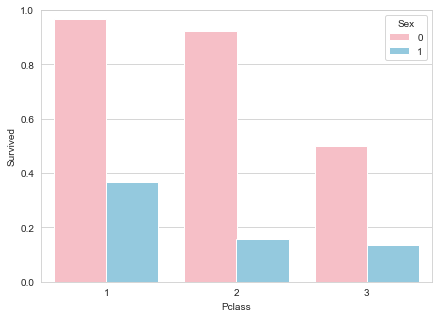

In [143]:
#### Notes the correlation between gender in each class, and their survival rate
plt.figure(figsize=(7,5))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
group = sns.barplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex, palette=["lightpink","skyblue",], ci=None)
## Females are much more likely to survive, even at a higher rate at lower classes than men from higher classes

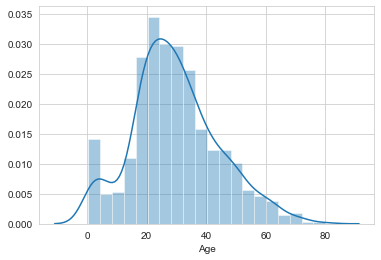

In [144]:
sns.distplot(train_data['Age'])
##Follows a normal distribution with a notable bump for very young children

In [145]:
##19% of Train Data contains NULL values for Age (177) ##
##20% of Test Data contains NULL values for Age (86) ##
#####Decided to replace Null Values with the average passanger age
##Should also try median to see if that improves the accuracy?

train_data.Age = train_data.Age.fillna(train_data.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

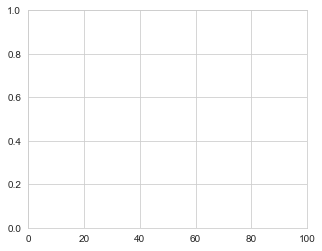

In [147]:
### Name and Ticket data
# Due to unknown way to work with the Ticket values as they are seemingly ungrouped and no notable naming convention, 
#     they are dropped
# The only notable value from the Name would be the title (Mr, Mrs, Miss) but this is primarily 
#    inferred from gender, age, and Parch, so it is dropped as well
train_data = train_data.drop(columns=['Name', 'Ticket'])
test_data = test_data.drop(columns=['Name', 'Ticket'])

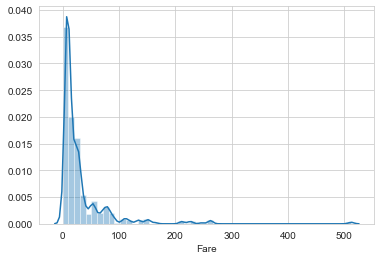

In [162]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.median())
sns.distplot(train_data['Fare'])
# Filled Fare with the median for any null values due it not being normally distributed
# Fare is not evenly distributed so normalization should be done

In [163]:
# Create x, where x the 'scores' column's values as floats
x = train_data[['Fare']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized  = pd.DataFrame(x_scaled)

In [168]:
train_data['Fare'] = df_normalized 

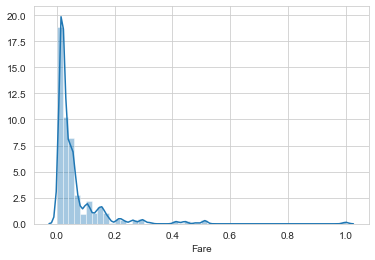

In [169]:
sns.distplot(train_data['Fare'])

In [170]:
##Embarked should be transformed into an integer value for easier comparison

train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))

#0.2% of Train Data contains NULL values for Embarked (2) ##
#####Decided to replace Null Embarked with the mode of Embarked
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode())

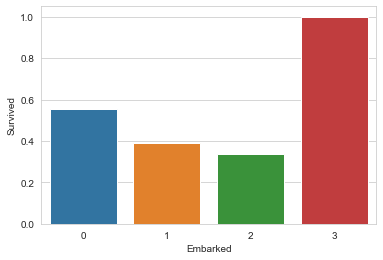

In [171]:
sns.barplot(x=train_data.Embarked, y=train_data.Survived, ci=None)

In [173]:

#test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

#train_data['familySize'] = train_data['SibSp'] + train_data['Parch']
#test_data['familySize'] = test_data['SibSp'] + test_data['Parch']

#train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode())

###train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
###test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))
train_data.head()

##19% of Train Data contains NULL values for Age (177) ##
##20% of Test Data contains NULL values for Age (86) ##
#####Decided to replace Null Values with the average passanger age


#0.2% of Test Data contains NULL values for Fare (1) ##
#####Decided to replace the 1 Null fare with the average fare

#####################################################################
####Competition Rules Dictate No Rows dropped from Test Data#########
#####################################################################

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.014151,2
1,1,1,0,38.0,1,0,0.139136,0
2,1,3,0,26.0,0,0,0.015469,2
3,1,1,0,35.0,1,0,0.103644,2
4,0,3,1,35.0,0,0,0.015713,2


In [174]:
df_survived = train_data.Survived
train_data = train_data.drop(columns=['Survived'])

In [175]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,0.014151,1
1,3,0,47.0,1,0,0.139136,2
2,2,1,62.0,0,0,0.015469,1
3,3,1,27.0,0,0,0.103644,2
4,3,0,22.0,1,1,0.015713,2


In [179]:
print(train_data.shape)
print(test_data.shape)

(891, 7)
(418, 7)


In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [181]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [182]:
df_survived = train_data.Survived
train_data = train_data.drop(columns=['Survived'])
df_survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [187]:
X_train, X_test, y_train, y_test = train_test_split(train_data, df_survived, test_size=0.25, random_state=0)

In [188]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
test_transformed = sc.transform(test_data)

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [190]:
prediction = knn.predict(test_transformed)
print(prediction)

[0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [191]:
print(knn.score(X_test, y_test))

0.4125560538116592


In [192]:
test_data.shape

(418, 7)

In [193]:
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [194]:
pred_test_rfc = rfc.predict(test_data)
print(pred_test_rfc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [195]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       139
           1       0.00      0.00      0.00        84

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.39      0.62      0.48       223

[[139   0]
 [ 84   0]]


C:\Users\Ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [197]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       139
           1       0.00      0.00      0.00        84

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.39      0.62      0.48       223

[[139   0]
 [ 84   0]]


C:\Users\Ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
mlpc = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1500, random_state=0)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [199]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       139
           1       0.00      0.00      0.00        84

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.39      0.62      0.48       223

[[139   0]
 [ 84   0]]


C:\Users\Ricky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
print(pred_mlpc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [201]:
pred_test_mlpc = mlpc.predict(test_data)
print(pred_test_mlpc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [202]:
solution = test_data.drop(columns=['Pclass', 'Sex','Age', 'SibSp', 'Parch','Fare', 'Embarked'])
pred_test_mlpc.size

418

In [203]:
test_ids.shape

(418,)

In [204]:
df = pd.DataFrame()

In [205]:
df['PassengerId'] = test_ids

In [206]:
df.shape

(418, 1)

In [207]:
df['Survived'] = pred_test_mlpc

In [208]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [209]:
print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [210]:
#df.to_csv('out.csv', index=False)

In [211]:
df2 = pd.DataFrame()
df2['PassengerId'] = test_ids
df2['Survived'] = prediction

In [212]:
print(df2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [213]:
#df2.to_csv('out_knn.csv', index=False)

In [214]:
df3 = pd.DataFrame()
df3['PassengerId'] = test_ids
df3['Survived'] = pred_test_rfc
df3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [215]:
#df3.to_csv('out_RFC.csv', index=False)